# ***Feature frame dataset***

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
feature_frame_path = '/Users/alex/zriveAM/zrive-ds/aws/data/feature_frame.csv'
feature_frame_df = pd.read_csv(feature_frame_path)

In [71]:
feature_frame_df.head(10)

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
5,33826472919172,ricepastapulses,2808434524292,3479090790532,2020-10-06 10:50:23,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
6,33826472919172,ricepastapulses,2808548917380,3476645445764,2020-10-06 14:23:08,2020-10-06 00:00:00,5,0.0,1.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
7,33826472919172,ricepastapulses,2808549900420,3437017956484,2020-10-06 14:24:26,2020-10-06 00:00:00,13,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
8,33826472919172,ricepastapulses,2808673927300,3539005440132,2020-10-06 17:57:23,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
9,33826472919172,ricepastapulses,2808728715396,3421126885508,2020-10-06 19:36:06,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


In [69]:
feature_frame_df['normalised_price'].head()

0    0.081052
1    0.081052
2    0.081052
3    0.081052
4    0.081052
Name: normalised_price, dtype: float64

Cada fila de este dataset es una combinación usuario-producto y outcome determina si ese usuario ha comprado ese producto, junto con otras columnas que nos dan información adiccional.

Primero de todo, quiero comprobar si realmente existen todas las combinaciones.

In [41]:
unique_products= feature_frame_df['variant_id'].nunique()
unique_users= feature_frame_df['user_id'].nunique()
unique_combinations = unique_products * unique_users

print(f"There are {unique_products} unique products")
print(f"There are {unique_users} unique users")
print(f"There should be {unique_combinations} unique combinations")


There are 976 unique products
There are 1937 unique users
There should be 1890512 unique combinations


In [42]:
real_unique_combinations= feature_frame_df[['variant_id', 'user_id']].drop_duplicates().shape[0]
print(f"There are {real_unique_combinations} unique combinations")

There are 1682424 unique combinations


Lo que hago a continuación es ver la distribución de productos por usuario, lo cual nos ayuda a identificar algun patron en usuarios que no estan asociados a todos los productos

In [58]:
user_product_counts = feature_frame_df.groupby('user_id')['variant_id'].nunique()
print(user_product_counts.describe())

print('--------------------------------------')
print(user_product_counts.sort_values().head(3))
print('--------------------------------------')
print(user_product_counts.sort_values().tail(3))


count    1937.000000
mean      868.572019
std        73.710590
min       614.000000
25%       834.000000
50%       877.000000
75%       915.000000
max       976.000000
Name: variant_id, dtype: float64
--------------------------------------
user_id
3537167515780    614
3421126885508    624
3539005440132    624
Name: variant_id, dtype: int64
--------------------------------------
user_id
3874925314180    976
3875142467716    976
5029635227780    976
Name: variant_id, dtype: int64


In [63]:
user_1 = feature_frame_df[feature_frame_df['user_id'] == 3537167515780]
print("User 1 date:", user_1['created_at'].value_counts())

user_2 = feature_frame_df[feature_frame_df['user_id'] == 3539005440132]
print("User 2 date:", user_1['created_at'].value_counts())


User 1 date: created_at
2020-10-06 10:37:05    614
Name: count, dtype: int64
User 2 date: created_at
2020-10-06 10:37:05    614
Name: count, dtype: int64


In [68]:
user_3 = feature_frame_df[feature_frame_df['user_id'] == 5029635227780]
print("User 3 date:", user_3['created_at'].value_counts())
user_4 = feature_frame_df[feature_frame_df['user_id'] == 3875142467716]
print("User 4 date:", user_4['created_at'].value_counts())

User 3 date: created_at
2021-03-03 13:15:57    976
Name: count, dtype: int64
User 4 date: created_at
2021-03-03 08:03:33    976
2021-02-05 09:36:41    877
Name: count, dtype: int64


In [53]:
print(feature_frame_df['created_at'].min())
print(feature_frame_df['created_at'].max())

2020-10-05 16:46:19
2021-03-03 14:42:05


Vemos como tiene sentido que, los primeros usuarios no tienen combinacion con todos los productos (ya que no estaban disponibles), mientras que los ultimos usuarios si que tienen todas las combinaciones.

Hay que tener en cuenta también, que cada combinacion aparecera tantas veces como pedidos haya hecho ese usuario, por eso el dataset tiene mas filas que las combinaciones posibles.

Vamos a entender las columnas del dataset:

In [23]:
print('Dataframe info:')
print(feature_frame_df.info())

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults        

In [24]:
print("Null values:")
print(feature_frame_df.isnull().sum())

Null values:
variant_id                          0
product_type                        0
order_id                            0
user_id                             0
created_at                          0
order_date                          0
user_order_seq                      0
outcome                             0
ordered_before                      0
abandoned_before                    0
active_snoozed                      0
set_as_regular                      0
normalised_price                    0
discount_pct                        0
vendor                              0
global_popularity                   0
count_adults                        0
count_children                      0
count_babies                        0
count_pets                          0
people_ex_baby                      0
days_since_purchase_variant_id      0
avg_days_to_buy_variant_id          0
std_days_to_buy_variant_id          0
days_since_purchase_product_type    0
avg_days_to_buy_product_type        0

outcome
0.0    0.988463
1.0    0.011537
Name: proportion, dtype: float64


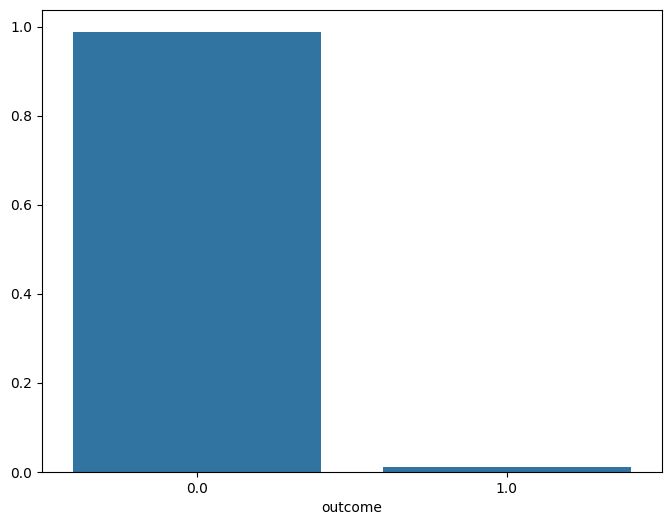

In [25]:
#Distribution of outcome
outcome_dist=feature_frame_df['outcome'].value_counts(normalize=True)
print(outcome_dist)

plt.figure(figsize=(8,6))
sns.barplot(x=outcome_dist.index, y= outcome_dist.values)
plt.show()

In [78]:
with pd.option_context('display.max_columns', None, 'display.width', 1000):
    print(feature_frame_df.sample(10))

             variant_id             product_type       order_id        user_id           created_at           order_date  user_order_seq  outcome  ordered_before  abandoned_before  active_snoozed  set_as_regular  normalised_price  discount_pct          vendor  global_popularity  count_adults  count_children  count_babies  count_pets  people_ex_baby  days_since_purchase_variant_id  avg_days_to_buy_variant_id  std_days_to_buy_variant_id  days_since_purchase_product_type  avg_days_to_buy_product_type  std_days_to_buy_product_type
469526   33824368033924            washingpowder  2900111655044  3791384969348  2021-01-18 10:24:50  2021-01-18 00:00:00               2      0.0             1.0               0.0             0.0             0.0          0.379236      0.428878          persil           0.020424           2.0             0.0           0.0         0.0             2.0                            82.0                        30.5                   28.724102                             

* variant_id: Id del producto

* product type: Tipo de producto  

* order_id: Id de la orden (misma combinación usuario-producto puede existir más de una vez). Outcome será 1 en los productos que ha pedido para esa orden y 0 para los productos que no ha pedido.

* user_id: Id del usuario

* created_at: Fecha creación pedido

* order_date: Fecha pedido realizado

* user_order_seq: Numero de pedido de un determinado usuario (4 --> es su cuarto pedido)

* outcome: Determina si usuario compra un producto dado un order_id (etiqueta de nuestro problema)

* ordered_before: 1 si producto se ha pedido anteriormente por un determinado usuario , 0 si no se ha pedido antes

* abandoned_before: 1 si producto se ha abandonado anteriormente por un determinado usuario , 0 si no se ha abandonado antes

* active_snoozed: 1 si producto esta en estado "snoozed" (guardado para más tarde ?)

* set_as_regular: Producto marcado como favorito por un determinado usuario

* normalised_price: Precio normalizado del producto

* discount_pct: Porcentaje de descuento del prodcuto

* vendor: Provedor/marca del producto

* global_popularity: Popularidad calculada de cada producto

* count_adults: Número de adultos asociados al user_id

* count_children: Número de niños asociados al user_id

* count_babies: Número de bebés asociados al user_id

* count_pets: Número de mascotas asociados al user_id

* people_ex_baby: Número de personas asociadas al user_id excluyendo bebés

* days_since_purchase_variant_id: Número de días desde la última vez que el usuario compro un determinado variant_id

* avg_days_to_buy_variant_id: Promedio de días que tarda el usuario en comprar un determinado variant_id

* std_days_to_buy_varinat_id: desviación estándar de los días que tarda el usuario en comprar un determinado variant_id

* days_since_purchase_product_type: Número de días desde la última vez que el usuario compro un determinado product_type

* avg_days_to_buy_product_type: Promedio de días que tarda el usuario en comprar un determinado product_type

* std_days_to_buy_product_type: desviación estándar de los días que tarda el usuario en comprar un determinado product_type



In [79]:
info_cols = ['variant_id', 'order_id', 'user_id','created_at', 'order_date']
label_col = 'outcome'
features_cols = [col for col in feature_frame_df.columns if col not in info_cols + [label_col]]

categorical_cols = ['product_type', 'vendor']
binary_cols = ['ordered_before', 'abandoned_before', 'active_snoozed', 'set_as_regular']
numerical_cols = [col for col in feature_frame_df.columns if col not in categorical_cols + binary_cols]

In [84]:
for col in binary_cols:
    print(f"Value counts {col}: {feature_frame_df[col].value_counts().to_dict()}")
    print(f"Mean outcome by {col} value: {feature_frame_df.groupby(col)[label_col].mean().to_dict()}")

Value counts ordered_before: {0.0: 2819658, 1.0: 60891}
Mean outcome by ordered_before value: {0.0: 0.008223337723936732, 1.0: 0.1649669080816541}
Value counts abandoned_before: {0.0: 2878794, 1.0: 1755}
Mean outcome by abandoned_before value: {0.0: 0.011106039542947498, 1.0: 0.717948717948718}
Value counts active_snoozed: {0.0: 2873952, 1.0: 6597}
Mean outcome by active_snoozed value: {0.0: 0.011302554809544488, 1.0: 0.1135364559648325}
Value counts set_as_regular: {0.0: 2870093, 1.0: 10456}
Mean outcome by set_as_regular value: {0.0: 0.010668992259135854, 1.0: 0.24971308339709258}
